# 01 - Data Cleaning & Preprocessing
> M·ª•c ti√™u: L√†m s·∫°ch d·ªØ li·ªáu, x·ª≠ l√Ω gi√° tr·ªã thi·∫øu, m√£ h√≥a, lo·∫°i b·ªè nhi·ªÖu v√† gi√° tr·ªã ngo·∫°i l·ªá. K·∫øt qu·∫£ ƒë·∫ßu ra: File `processed.csv` ho√†n ch·ªânh, s·∫µn s√†ng ƒë·ªÉ hu·∫•n luy·ªán m√¥ h√¨nh.

## 1.1: Import c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import joblib

## 1.2: ƒê·ªçc d·ªØ li·ªáu

In [24]:
# ƒê·ªçc file CSV t·ª´ th∆∞ m·ª•c data/
df = pd.read_csv("../data/raw/Student Depression Dataset.csv")
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')  # Lo·∫°i b·ªè kho·∫£ng tr·∫Øng th·ª´a trong t√™n c·ªôt
df.head()

id  gender   age           city profession  academic_pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   work_pressure  cgpa  study_satisfaction  job_satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

      sleep_duration dietary_habits   degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc   
2  Less than 5 hours        Healthy       BA   
3          7-8 hours       Moderate      BCA   
4          5-6 hours       Moderate   M.Tech   

  have_you_ever_had_suicidal_thoughts_?  work/study_hours  financial_stress  \
0                                   Yes               3.0               1.0   
1                                    No               3.0               2.0   
2                                    No               9.0               1.0   
3                                   Yes               4.0               5.0   
4                                   Yes               1.0               1.0   

  family_history_of_mental_illness  depression  
0                               No           1  
1                              Yes           0  
2                              Yes           0  
3                              Yes           1  
4                               No           0

### chuy·ªÉn c·ªôt age sang d·∫°ng int 32

In [25]:
df['age'] = df['age'].astype('int32')

## 1.3: Ki·ªÉm tra th√¥ng tin d·ªØ li·ªáu

In [26]:
# T·ªïng quan v·ªÅ d·ªØ li·ªáu
df.info()

# Ki·ªÉm tra gi√° tr·ªã thi·∫øu
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   gender                                 27901 non-null  object 
 2   age                                    27901 non-null  int32  
 3   city                                   27901 non-null  object 
 4   profession                             27901 non-null  object 
 5   academic_pressure                      27901 non-null  float64
 6   work_pressure                          27901 non-null  float64
 7   cgpa                                   27901 non-null  float64
 8   study_satisfaction                     27901 non-null  float64
 9   job_satisfaction                       27901 non-null  float64
 10  sleep_duration                         27901 non-null  object 
 11  di

id                                       0
gender                                   0
age                                      0
city                                     0
profession                               0
academic_pressure                        0
work_pressure                            0
cgpa                                     0
study_satisfaction                       0
job_satisfaction                         0
sleep_duration                           0
dietary_habits                           0
degree                                   0
have_you_ever_had_suicidal_thoughts_?    0
work/study_hours                         0
financial_stress                         3
family_history_of_mental_illness         0
depression                               0
dtype: int64

In [27]:
print(df['degree'].unique())
df[df['financial_stress'].isnull()].index
# print(np.sort(df['study_satisfaction'].unique()))
# df['degree'].nunique()

['B.Pharm' 'BSc' 'BA' 'BCA' 'M.Tech' 'PhD' 'Class 12' 'B.Ed' 'LLB' 'BE'
 'M.Ed' 'MSc' 'BHM' 'M.Pharm' 'MCA' 'MA' 'B.Com' 'MD' 'MBA' 'MBBS' 'M.Com'
 'B.Arch' 'LLM' 'B.Tech' 'BBA' 'ME' 'MHM' 'Others']


Index([4458, 13596, 19266], dtype='int64')

## 1.4: X·ª≠ l√Ω gi√° tr·ªã thi·∫øu nh·ªè h∆°n 5%

In [28]:
# ƒêi·ªÅn trung b√¨nh (ho·∫∑c mode) n·∫øu c·ªôt thi·∫øu √≠t
for col in df.columns:
    missing_ratio = df[col].isnull().sum() / len(df)
    if 0 < missing_ratio < 0.05:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].mean())

## 1.5:Lo·∫°i b·ªè c√°c thu·ªôc t√≠nh d∆∞ th·ª´a

### 1.5.1: Lo·∫°i b·ªè c·ªôt kh√¥ng c√≥ gi√° tr·ªã h·ªçc m√°y

In [29]:
cols_to_drop = ['id', 'work_pressure', 'job_satisfaction','profession']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

### 1.5.2: Lo·∫°i b·ªè c√°c th√¥ng tin th√†nh ph·ªë sai l·ªách

In [30]:
invalid_city_names = [
    'Saanvi', 'Bhavna', 'Mira', 'Harsha', 'Vaanya', 'Gaurav', 'Harsh', 'Reyansh', 'Rashi', 'Mihir',
    'Nalini', 'Nandini', 'M.Tech', 'ME', 'M.Com', 'Nalyan', 'Khaziabad', 'Less Delhi', 'City', '3.0', 'Less than 5 Kalyan'
]

df = df[~df['city'].isin(invalid_city_names)]

## 1.6: √Ånh x·∫° Vi·ªát h√≥a gi√° tr·ªã city v√† degree

### 1.6.1 √Ånh x·∫° th√†nh ph·ªë v√† g√°n gi√° tr·ªã theo c·∫•p ƒë·ªô ƒë√¥ th·ªã

In [31]:
# C·∫•p ƒë·ªô ƒë√¥ th·ªã ·∫§n ƒê·ªô
city_level_map = {
    # S - Si√™u ƒë√¥ th·ªã
    'Mumbai': 'S',
    'Delhi': 'S',

    # I - ƒê√¥ th·ªã trung t√¢m
    'Bangalore': 'I', 'Kolkata': 'I', 'Chennai': 'I', 'Hyderabad': 'I',

    # II - C√¥ng nghi·ªáp / Kinh t·∫ø l·ªõn
    'Pune': 'II', 'Ahmedabad': 'II', 'Surat': 'II', 'Kanpur': 'II',

    # III - Th·ªß ph·ªß & V√πng
    'Lucknow': 'III', 'Jaipur': 'III', 'Nagpur': 'III', 'Indore': 'III',
    'Patna': 'III', 'Bhopal': 'III', 'Visakhapatnam': 'III',

    # IV - V·ªá tinh & CN nh·ªè
    'Thane': 'IV', 'Ghaziabad': 'IV', 'Faridabad': 'IV', 'Vadodara': 'IV',
    'Meerut': 'IV', 'Nashik': 'IV', 'Kalyan': 'IV', 'Vasai-Virar': 'IV',
    'Rajkot': 'IV', 'Ludhiana': 'IV',

    # V - ƒê·∫∑c th√π
    'Srinagar': 'V', 'Varanasi': 'V', 'Agra': 'V'
}
vn_city_groups = {
    'ƒê·∫∑c Bi·ªát': ['H√† N·ªôi', 'TP. H·ªì Ch√≠ Minh'],
    'I': ['H·∫£i Ph√≤ng', 'ƒê√† N·∫µng', 'C·∫ßn Th∆°'],
    'II': ['B√¨nh D∆∞∆°ng', 'ƒê·ªìng Nai', 'B√† R·ªãa - V≈©ng T√†u', 'B·∫Øc Ninh', 'Qu·∫£ng Ninh', 'Vƒ©nh Ph√∫c', 'Th√°i Nguy√™n', 'H·∫£i D∆∞∆°ng'],
    'III': ['Thanh H√≥a', 'Ngh·ªá An', 'Kh√°nh H√≤a', 'Th·ª´a Thi√™n Hu·∫ø', 'Long An', 'Ti·ªÅn Giang', 'B·∫Øc Giang', 'Qu·∫£ng Nam', 'B√¨nh ƒê·ªãnh', 'ƒê·∫Øk L·∫Øk'],
    'IV': ['Th√°i B√¨nh', 'H∆∞ng Y√™n', 'Nam ƒê·ªãnh', 'H√† Nam', 'Ninh B√¨nh',
           'B√¨nh Thu·∫≠n', 'Ph√∫ Y√™n', 'Qu·∫£ng Ng√£i', 'H√† Tƒ©nh', 'Qu·∫£ng B√¨nh', 'Qu·∫£ng Tr·ªã', 'Ninh Thu·∫≠n',
           'An Giang', 'Ki√™n Giang', 'B·∫øn Tre', 'Vƒ©nh Long', 'Tr√† Vinh', 'S√≥c TrƒÉng', 'B·∫°c Li√™u', 'C√† Mau', 'H·∫≠u Giang'],
    'V': ['H√† Giang', 'Cao B·∫±ng', 'B·∫Øc K·∫°n', 'L·∫°ng S∆°n', 'Tuy√™n Quang', 'Y√™n B√°i', 'L√†o Cai', 'Lai Ch√¢u',
          'ƒêi·ªán Bi√™n', 'S∆°n La', 'H√≤a B√¨nh', 'Kon Tum', 'Gia Lai', 'ƒê·∫Øk N√¥ng', 'L√¢m ƒê·ªìng', 'B√¨nh Ph∆∞·ªõc', 'T√¢y Ninh'],
    'Di s·∫£n': ['Hu·∫ø', 'Qu·∫£ng Nam', 'L√¢m ƒê·ªìng', 'Ninh B√¨nh']
}


### 1.6.2: Vi·∫øt h√†m √°nh x·∫° x√°c su·∫•t theo quy t·∫Øc c·ªßa t·ª´ng c·∫•p ƒë·ªô

In [32]:
import random

def map_indian_city_to_vietnamese(city):
    level = city_level_map.get(city)
    if not level:
        return "Kh√°c"

    if level == 'S':
        choices = vn_city_groups['ƒê·∫∑c Bi·ªát'] * 7 + vn_city_groups['I'] * 2 + vn_city_groups['II']
    elif level == 'I':
        choices = vn_city_groups['ƒê·∫∑c Bi·ªát'] * 4 + (vn_city_groups['I'] + vn_city_groups['II']) * 4 + vn_city_groups['III'] * 2
    elif level == 'II':
        choices = vn_city_groups['II'] * 5 + (vn_city_groups['I'] + vn_city_groups['ƒê·∫∑c Bi·ªát']) * 3 + vn_city_groups['III'] * 2
    elif level == 'III':
        choices = vn_city_groups['III'] * 4 + vn_city_groups['IV'] * 3 + vn_city_groups['II'] * 2 + (vn_city_groups['I'] + vn_city_groups['ƒê·∫∑c Bi·ªát'])
    elif level == 'IV':
        choices = vn_city_groups['IV'] * 5 + vn_city_groups['III'] * 3 + vn_city_groups['V'] + vn_city_groups['II']
    elif level == 'V':
        choices = vn_city_groups['Di s·∫£n'] * 6 + (vn_city_groups['IV'] + vn_city_groups['III']) * 3 + ['Kh√°c']
    else:
        return "Kh√°c"

    return random.choice(choices)


### 1.6.3: √Ånh x·∫° sang b·∫±ng c·∫•p Vi·ªát Nam

In [33]:
degree_mapping = {
    # Ph·ªï th√¥ng
    'Class 12': 'T·ªët nghi·ªáp THPT',
    # C·ª≠ nh√¢n
    'BA': 'C·ª≠ nh√¢n X√£ h·ªôi & Nh√¢n vƒÉn',
    'BSc': 'C·ª≠ nh√¢n Khoa h·ªçc T·ª± nhi√™n',
    'B.Com': 'C·ª≠ nh√¢n Th∆∞∆°ng m·∫°i / Kinh t·∫ø',
    'BBA': 'C·ª≠ nh√¢n Qu·∫£n tr·ªã Kinh doanh',
    'BCA': 'C·ª≠ nh√¢n CNTT',
    'BHM': 'C·ª≠ nh√¢n Qu·∫£n l√Ω Kh√°ch s·∫°n',
    'B.Ed': 'C·ª≠ nh√¢n S∆∞ ph·∫°m',
    'LLB': 'C·ª≠ nh√¢n Lu·∫≠t',
    'BE': 'K·ªπ s∆∞',
    'B.Tech': 'K·ªπ s∆∞ C√¥ng ngh·ªá',
    'B.Arch': 'Ki·∫øn tr√∫c s∆∞',
    'B.Pharm': 'D∆∞·ª£c sƒ© ƒê·∫°i h·ªçc',
    'MBBS': 'B√°c sƒ© ƒêa khoa',
    # Th·∫°c sƒ©
    'MA': 'Th·∫°c sƒ© X√£ h·ªôi & Nh√¢n vƒÉn',
    'MSc': 'Th·∫°c sƒ© Khoa h·ªçc T·ª± nhi√™n',
    'M.Com': 'Th·∫°c sƒ© Th∆∞∆°ng m·∫°i',
    'MBA': 'Th·∫°c sƒ© Qu·∫£n tr·ªã Kinh doanh',
    'MCA': 'Th·∫°c sƒ© CNTT',
    'MHM': 'Th·∫°c sƒ© Qu·∫£n l√Ω Kh√°ch s·∫°n',
    'M.Ed': 'Th·∫°c sƒ© Gi√°o d·ª•c',
    'LLM': 'Th·∫°c sƒ© Lu·∫≠t',
    'ME': 'Th·∫°c sƒ© K·ªπ thu·∫≠t',
    'M.Tech': 'Th·∫°c sƒ© K·ªπ thu·∫≠t C√¥ng ngh·ªá',
    'M.Pharm': 'Th·∫°c sƒ© D∆∞·ª£c h·ªçc',
    'MD': 'B√°c sƒ© Chuy√™n khoa',
    # Ti·∫øn sƒ©
    'PhD': 'Ti·∫øn sƒ©',
    # Kh√°c
    'Others': 'Kh√°c'
}


## 1.6.4: √Ånh x·∫° Sleep Duration

In [34]:
sleep_duration_mapping = {
    '5-6 hours': '5-6 ti·∫øng',
    'Less than 5 hours': 'D∆∞·ªõi 5 ti·∫øng',
    '7-8 hours': '7-8 ti·∫øng',
    'More than 8 hours': 'H∆°n 8 ti·∫øng',
    'Others': 'Kh√°c'
}

## 1.6.5: √Ånh x·∫° Dietary Habits

In [35]:
dietary_habits_mapping = {
    'Healthy': 'L√†nh m·∫°nh',
    'Moderate': 'Trung b√¨nh',
    'Unhealthy': 'Kh√¥ng l√†nh m·∫°nh',
    'Others': 'Kh√°c'
}

### 1.6.6: C·∫≠p nh·∫≠t dataframe

In [36]:
df['city'] = df['city'].apply(map_indian_city_to_vietnamese)
df['degree'] = df['degree'].map(degree_mapping)
df['sleep_duration'] = df['sleep_duration'].map(sleep_duration_mapping)
df['dietary_habits'] = df['dietary_habits'].map(dietary_habits_mapping)

In [37]:
df.head()

gender  age       city  academic_pressure  cgpa  study_satisfaction  \
0    Male   33    Ngh·ªá An                5.0  8.97                 2.0   
1  Female   24  B·∫Øc Giang                2.0  5.90                 5.0   
2    Male   31    Ngh·ªá An                3.0  7.03                 5.0   
3  Female   28  Thanh H√≥a                3.0  5.59                 2.0   
4  Female   25    H√† Tƒ©nh                4.0  8.13                 3.0   

  sleep_duration dietary_habits                      degree  \
0      5-6 ti·∫øng      L√†nh m·∫°nh             D∆∞·ª£c sƒ© ƒê·∫°i h·ªçc   
1      5-6 ti·∫øng     Trung b√¨nh   C·ª≠ nh√¢n Khoa h·ªçc T·ª± nhi√™n   
2   D∆∞·ªõi 5 ti·∫øng      L√†nh m·∫°nh   C·ª≠ nh√¢n X√£ h·ªôi & Nh√¢n vƒÉn   
3      7-8 ti·∫øng     Trung b√¨nh                C·ª≠ nh√¢n CNTT   
4      5-6 ti·∫øng     Trung b√¨nh  Th·∫°c sƒ© K·ªπ thu·∫≠t C√¥ng ngh·ªá   

  have_you_ever_had_suicidal_thoughts_?  work/study_hours  financial_stress  \
0                                   Yes               3.0               1.0   
1                                    No               3.0               2.0   
2                                    No               9.0               1.0   
3                                   Yes               4.0               5.0   
4                                   Yes               1.0               1.0   

  family_history_of_mental_illness  depression  
0                               No           1  
1                              Yes           0  
2                              Yes           0  
3                              Yes           1  
4                               No           0

## 1.7: X·ª≠ l√Ω ngo·∫°i l·ªá v·ªõi IQR (Interquartile Range)

In [38]:
def remove_outliers_iqr(data, cols):
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower) & (data[col] <= upper)]
    return data

# √Åp d·ª•ng cho c√°c c·ªôt s·ªë
numeric_cols = ['age','cgpa', 'academic_pressure', 'study_satisfaction',
                'work/study_hours', 'financial_stress']

df = remove_outliers_iqr(df, numeric_cols)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27855 entries, 0 to 27900
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 27855 non-null  int64  
 1   age                                    27855 non-null  int32  
 2   city                                   27855 non-null  int32  
 3   academic_pressure                      27855 non-null  float64
 4   cgpa                                   27855 non-null  float64
 5   study_satisfaction                     27855 non-null  float64
 6   sleep_duration                         27855 non-null  int32  
 7   dietary_habits                         27855 non-null  int32  
 8   degree                                 27855 non-null  int32  
 9   have_you_ever_had_suicidal_thoughts_?  27855 non-null  int64  
 10  work/study_hours                       27855 non-null  float64
 11  financi

In [39]:
df.head()

gender  age       city  academic_pressure  cgpa  study_satisfaction  \
0    Male   33    Ngh·ªá An                5.0  8.97                 2.0   
1  Female   24  B·∫Øc Giang                2.0  5.90                 5.0   
2    Male   31    Ngh·ªá An                3.0  7.03                 5.0   
3  Female   28  Thanh H√≥a                3.0  5.59                 2.0   
4  Female   25    H√† Tƒ©nh                4.0  8.13                 3.0   

  sleep_duration dietary_habits                      degree  \
0      5-6 ti·∫øng      L√†nh m·∫°nh             D∆∞·ª£c sƒ© ƒê·∫°i h·ªçc   
1      5-6 ti·∫øng     Trung b√¨nh   C·ª≠ nh√¢n Khoa h·ªçc T·ª± nhi√™n   
2   D∆∞·ªõi 5 ti·∫øng      L√†nh m·∫°nh   C·ª≠ nh√¢n X√£ h·ªôi & Nh√¢n vƒÉn   
3      7-8 ti·∫øng     Trung b√¨nh                C·ª≠ nh√¢n CNTT   
4      5-6 ti·∫øng     Trung b√¨nh  Th·∫°c sƒ© K·ªπ thu·∫≠t C√¥ng ngh·ªá   

  have_you_ever_had_suicidal_thoughts_?  work/study_hours  financial_stress  \
0                                   Yes               3.0               1.0   
1                                    No               3.0               2.0   
2                                    No               9.0               1.0   
3                                   Yes               4.0               5.0   
4                                   Yes               1.0               1.0   

  family_history_of_mental_illness  depression  
0                               No           1  
1                              Yes           0  
2                              Yes           0  
3                              Yes           1  
4                               No           0

## 1.8: M√£ h√≥a d·ªØ li·ªáu ph√¢n lo·∫°i

In [40]:
# L√†m s·∫°ch tr∆∞·ªõc khi map (cho t·∫•t c·∫£ c·ªôt nh·ªã ph√¢n)
for col in ['gender', 'have_you_ever_had_suicidal_thoughts_?', 'family_history_of_mental_illness']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.lower()
# M√£ h√≥a c√°c c·ªôt nh·ªã ph√¢n
binary_map = {
    'gender': {'male': 1, 'female': 0},
    'have_you_ever_had_suicidal_thoughts_?': {'yes': 1, 'no': 0},
    'family_history_of_mental_illness': {'yes': 1, 'no': 0}
}

for col, mapping in binary_map.items():
    df[col] = df[col].map(mapping)

# Label Encoding c√°c c·ªôt c√≤n l·∫°i
multi_cat_cols = ['city', 'degree', 'sleep_duration', 'dietary_habits']

label_encoders = {}
for col in multi_cat_cols:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
joblib.dump(label_encoders, '../models/label_encoders.pkl')

['../models/label_encoders.pkl']

In [41]:
df.head()

gender  age  city  academic_pressure  cgpa  study_satisfaction  \
0       1   33    35                5.0  8.97                 2.0   
1       0   24     7                2.0  5.90                 5.0   
2       1   31    35                3.0  7.03                 5.0   
3       0   28    47                3.0  5.59                 2.0   
4       0   25    19                4.0  8.13                 3.0   

   sleep_duration  dietary_habits  degree  \
0               0               2      10   
1               0               3       3   
2               2               2       9   
3               1               3       2   
4               0               3      20   

   have_you_ever_had_suicidal_thoughts_?  work/study_hours  financial_stress  \
0                                      1               3.0               1.0   
1                                      0               3.0               2.0   
2                                      0               9.0               1.0   
3                                      1               4.0               5.0   
4                                      1               1.0               1.0   

   family_history_of_mental_illness  depression  
0                                 0           1  
1                                 1           0  
2                                 1           0  
3                                 1           1  
4                                 0           0

## 1.9: Ki·ªÉm tra l·∫ßn cu·ªëi & l∆∞u d·ªØ li·ªáu ƒë√£ x·ª≠ l√Ω

In [42]:
print("D·ªØ li·ªáu sau x·ª≠ l√Ω:")
print(df.info())
# L∆∞u l·∫°i d·ªØ li·ªáu s·∫°ch ƒë·ªÉ d√πng cho b∆∞·ªõc ti·∫øp theo
df.to_csv("../data/processed/processed.csv", index=False)
print("ƒê√£ l∆∞u file: data/processed/processed.csv")


D·ªØ li·ªáu sau x·ª≠ l√Ω:
<class 'pandas.core.frame.DataFrame'>
Index: 27855 entries, 0 to 27900
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 27855 non-null  int64  
 1   age                                    27855 non-null  int32  
 2   city                                   27855 non-null  int32  
 3   academic_pressure                      27855 non-null  float64
 4   cgpa                                   27855 non-null  float64
 5   study_satisfaction                     27855 non-null  float64
 6   sleep_duration                         27855 non-null  int32  
 7   dietary_habits                         27855 non-null  int32  
 8   degree                                 27855 non-null  int32  
 9   have_you_ever_had_suicidal_thoughts_?  27855 non-null  int64  
 10  work/study_hours                       27855 non-

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


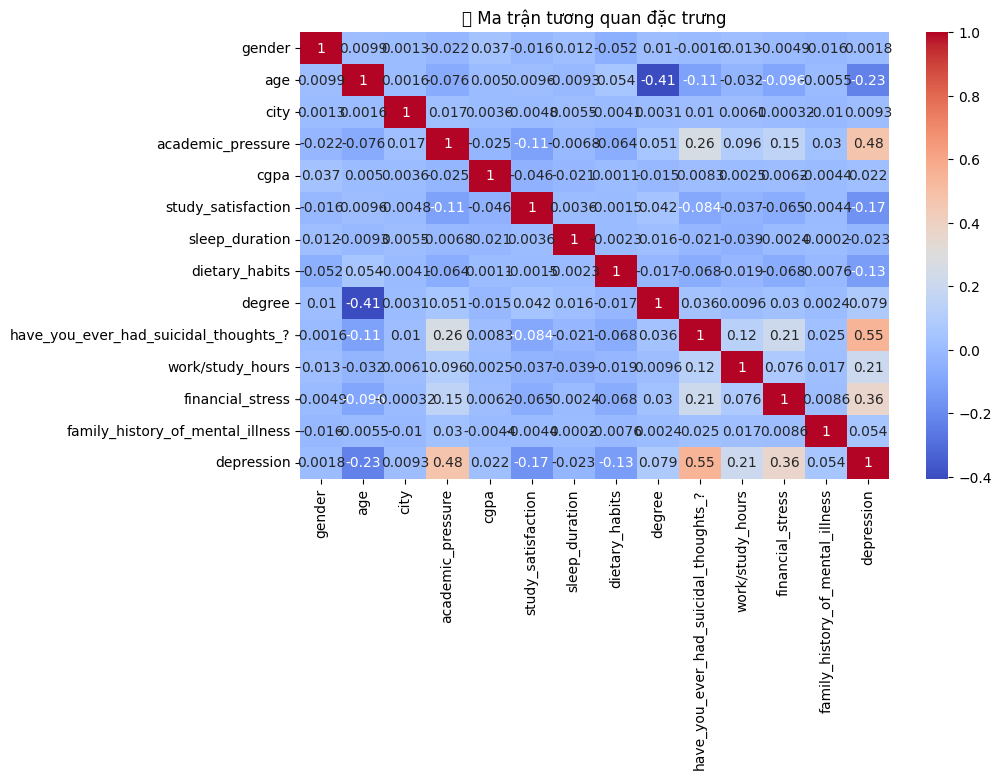

In [43]:
#Ki·ªÉm tra t∆∞∆°ng quan s∆° b·ªô
plt.figure(figsize=(9.5, 5.8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("üîç Ma tr·∫≠n t∆∞∆°ng quan ƒë·∫∑c tr∆∞ng")
plt.show()

In [44]:
# T√°ch X v√† y
from sklearn.model_selection import train_test_split
X = df.drop('depression', axis=1)
y = df['depression']

# T√°ch 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train.to_csv("../data/processed/X_train_mod.csv", index=False)
X_test.to_csv("../data/processed/X_test_mod.csv", index=False)
y_train.to_csv("../data/processed/y_train_mod.csv", index=False)
y_test.to_csv("../data/processed/y_test_mod.csv", index=False)

print(" ƒê√£ l∆∞u X_train, X_test, y_train, y_test v√†o th∆∞ m·ª•c /data/")

 ƒê√£ l∆∞u X_train, X_test, y_train, y_test v√†o th∆∞ m·ª•c /data/
